# Analysis Of Customer Profile And Equipment Preference For A Fitness Equipment Company


Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.



### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("aerofit_treadmill.csv")

In [3]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
data.shape

(180, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


#### Preliminary Analysis of Metrics

##### Product

In [8]:
data["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

# Product Portfolio:

- The KP281 is an entry-level treadmill that sells for 1,500 USD

- The KP481 is for mid-level runners that sell for 1,750 USD

- The KP781 treadmill is having advanced features that sell for 2,500 USD

In [9]:
# Create a column having prices of products

data["Price"]=np.select([data["Product"] == "KP281",data["Product"] == "KP481",data["Product"] == "KP781"],[1500,1750,2500])

In [10]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500


In [11]:
data["Product"].describe()

count       180
unique        3
top       KP281
freq         80
Name: Product, dtype: object

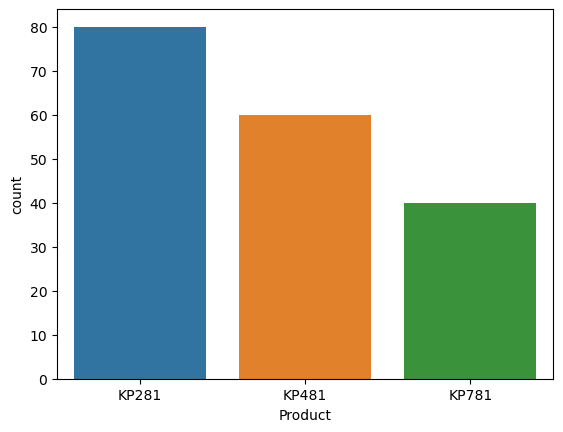

In [12]:
sns.countplot(x= data["Product"])
plt.show()

##### Age

In [13]:
data["Age"].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [14]:
mean_age=data["Age"].mean()
mean_age

28.788888888888888

In [15]:
median_age=data["Age"].median()
median_age

26.0

<function matplotlib.pyplot.show(close=None, block=None)>

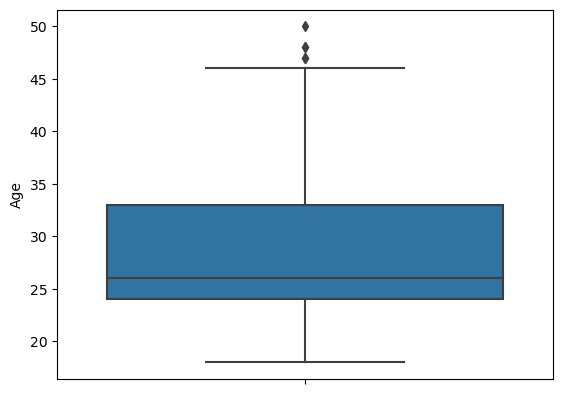

In [16]:
sns.boxplot(y=data["Age"])
plt.show

###### The difference between the mean and median is less, hence there is no need to remove the outliers

##### Gender

In [17]:
data["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [18]:
data["Gender"].describe()

count      180
unique       2
top       Male
freq       104
Name: Gender, dtype: object

Percentage of Male = Number of males / Total number of people

In [19]:
Male_percentage = (104/180)
round(Male_percentage,2)

0.58

Percentage of Female = Number of Females / Total number of people

In [20]:
Female_percentage = (76/180)
round(Female_percentage,2)

0.42

#### Observation : 58 % are Male annd 42 % are Female

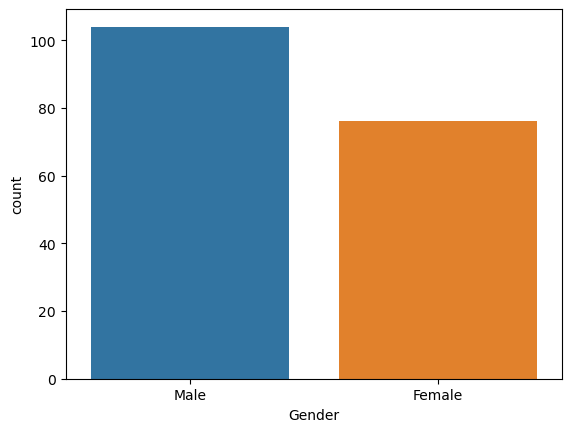

In [21]:
sns.countplot(x=data["Gender"])
plt.show()

##### Education

In [22]:
data["Education"].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [23]:
data["Education"].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

In [24]:
mean_edu = data["Education"].mean()
mean_edu

15.572222222222223

In [25]:
median_edu = data["Education"].median()
median_edu

16.0

In [26]:
abs(mean_edu-median_edu)

0.42777777777777715

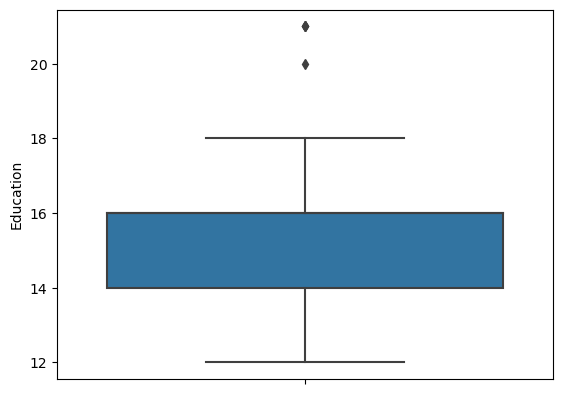

In [27]:
sns.boxplot(y=data["Education"])
plt.show()

###### The difference between the mean and median is less, hence there is no need to remove the outliers

##### Maritial Status

In [28]:
data["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [29]:
data["MaritalStatus"].describe()

count           180
unique            2
top       Partnered
freq            107
Name: MaritalStatus, dtype: object

In [30]:
partnered = len(data[data["MaritalStatus"]=="Partnered"])
single = len(data[data["MaritalStatus"]=="Single"])
total_marital = len(data["MaritalStatus"])

In [31]:
round(partnered/total_marital,2)

0.59

In [32]:
round(single/total_marital,2)

0.41

#### Observation : 59 % are Partnered annd 41 % are Single

##### Usage

In [33]:
data["Usage"].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

In [34]:
data["Usage"].mean()

3.4555555555555557

In [35]:
data["Usage"].median()

3.0

In [36]:
abs(data["Usage"].median()-data["Usage"].mean())

0.4555555555555557

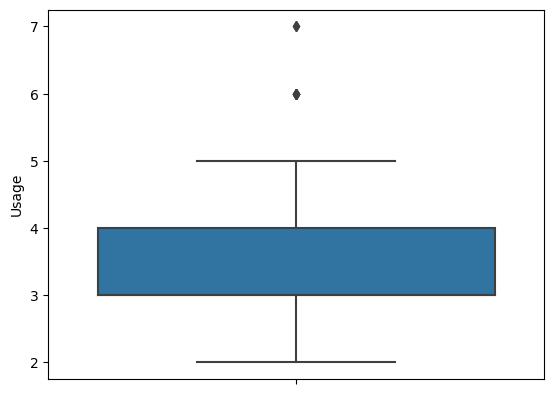

In [37]:
sns.boxplot(y=data["Usage"])
plt.show()

###### The difference between the mean and median is less, hence there is no need to remove the outliers

##### Income

In [38]:
data["Income"].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [39]:
data["Income"].mean()

53719.57777777778

In [40]:
data["Income"].median()

50596.5

In [41]:
abs(data["Income"].median()- data["Income"].mean())

3123.0777777777766

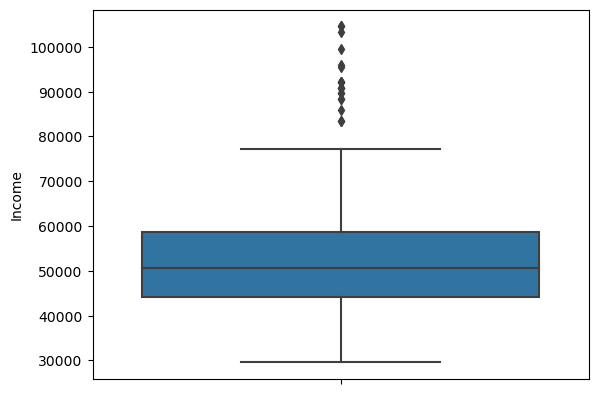

In [42]:
sns.boxplot(y=data["Income"])
plt.show()

##### Fitness

In [43]:
data["Fitness"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [44]:
data["Fitness"].describe()

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

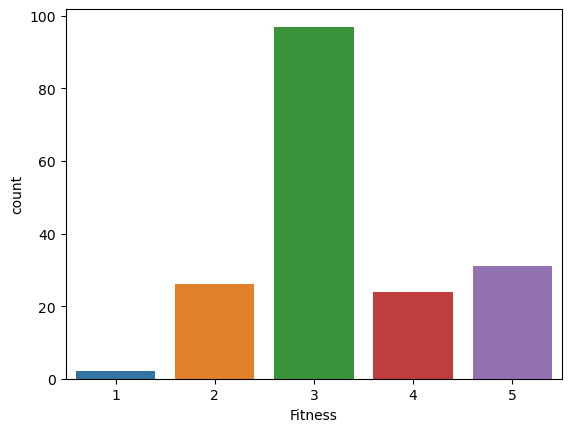

In [45]:
sns.countplot(x=data["Fitness"])
plt.show()

##### Miles

In [46]:
data["Miles"].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [47]:
abs(data["Miles"].median()- data["Miles"].mean())

9.194444444444443

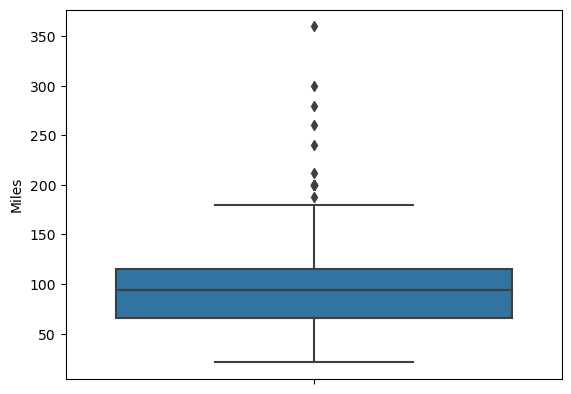

In [48]:
sns.boxplot(y=data["Miles"])
plt.show()

###### The difference between the mean and median is less, hence there is no need to remove the outliers

### VISUAL ANALYSIS

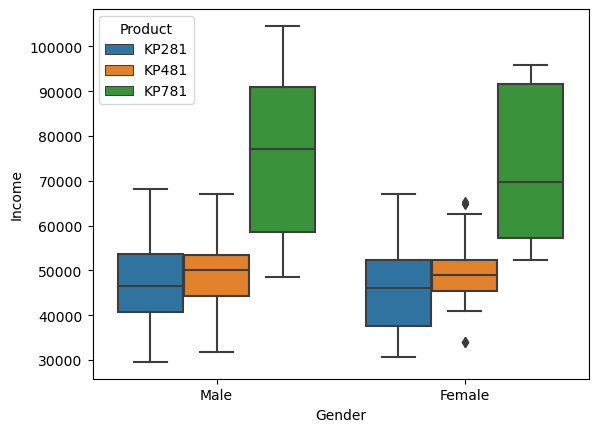

In [49]:
sns.boxplot(x="Gender",y="Income",hue="Product",data=data)
plt.show()

##### Inference
- From this graph it is infered that the people with higher salary prefer the product KP781
- People with lower and mid income levels prefer KP281 and KP481

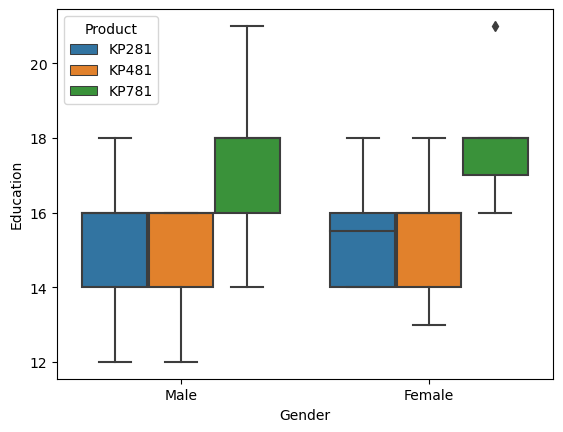

In [50]:
sns.boxplot(x="Gender",y="Education",hue="Product",data=data)
plt.show()

##### Inference
- From this graph it is infered that the people with years of education over 16 years tend to choose the product KP781
- People with years of education lower than 16 years tend to choose the products KP281 and KP481

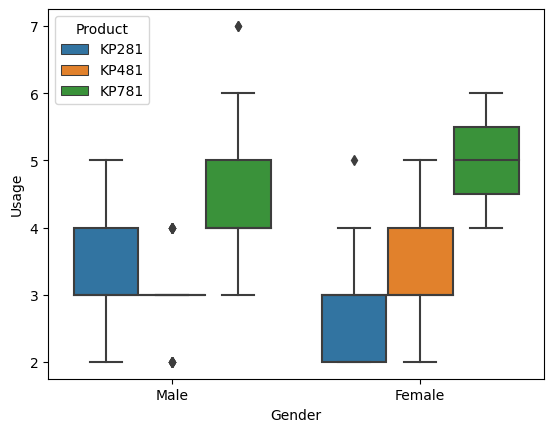

In [51]:
sns.boxplot(x="Gender",y="Usage",hue="Product",data=data)
plt.show()

##### Inference
- From this graph it is infered that the product KP781 is most used

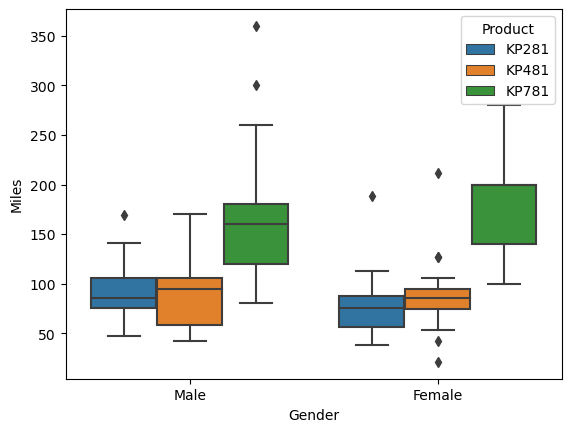

In [52]:
sns.boxplot(x="Gender",y="Miles",hue="Product",data=data)
plt.show()

##### Inference
- From this graph it is infered that people using the product KP781 have run the most miles

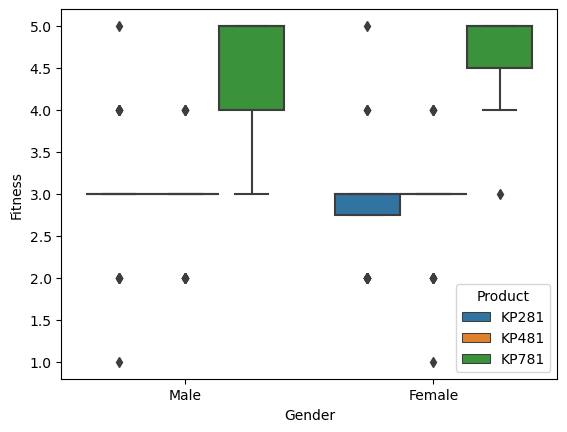

In [53]:
sns.boxplot(x="Gender",y="Fitness",hue="Product",data=data)
plt.show()

##### Inference
- From this graph it is infered that people using the product KP781 tend to be more fit
- Average fitness of the people using the other two products tend to be at 3

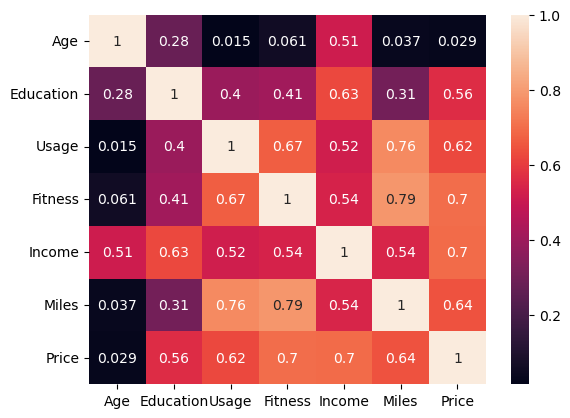

In [54]:
sns.heatmap(data.corr(),annot=True)
plt.show()

##### Inference
- Fitness and Miles have higher correlation Hence people who run more miles tend to be more fit
- Fitness and Usage have higher correlation, Hence people who use the product more tend to be more fit
- Fitness and Price have higher correlation Hence people who use the higher price product tend to be more fit

## Probability

In [55]:
pd.crosstab(index=data["Gender"],columns=data["Product"],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [56]:
pd.crosstab(index=data["Gender"],columns=data["Product"],margins=True,normalize=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


- The probability of buying KP281 is 0.44 - 44%
- The probability of buying KP481 is 0.33 - 33%
- The probability of buying KP781 is 0.22 - 22%
- The probability of buying KP281 by male is 0.22 - 22%
- The probability of buying KP481 by male is 0.17 - 17%
- The probability of buying KP781 by male is 0.18 - 18%
- The probability of buying KP281 by female is 0.22 - 22%
- The probability of buying KP481 by female is 0.16 - 16%
- The probability of buying KP781 by female is 0.03 - 3%


In [57]:
pd.crosstab(index=data["Gender"],columns=data["Product"],margins=True,normalize="index")

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


- The probability of KP281 being bought by a male 0.38 - 38%
- The probability of KP481 being bought by a male 0.29 - 29%
- The probability of KP781 being bought by a male 0.31 - 31%
- The probability of KP281 being bought by a female 0.52 - 52%
- The probability of KP481 being bought by a female 0.38 - 38%
- The probability of KP781 being bought by a female 0.09 - 9%


In [58]:
pd.crosstab(index = data["MaritalStatus"], columns=data["Product"],margins=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


In [59]:
pd.crosstab(index = data["MaritalStatus"], columns=data["Product"],margins=True, normalize=True)


Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.266667,0.200000,0.127778,0.594444
Single,0.177778,0.133333,0.094444,0.405556
All,0.444444,0.333333,0.222222,1.000000


- The probability of buying KP281 by Partnered person is 0.27 - 27%
- The probability of buying KP481 by Partnered person is 0.20 - 20%
- The probability of buying KP781 by Partnered person is 0.12 - 12%
- The probability of buying KP281 by single person is 0.17 - 17%
- The probability of buying KP481 by single person is 0.13 - 13%
- The probability of buying KP781 by single person is 0.09 - 9%


In [60]:
pd.crosstab(index = data["MaritalStatus"], columns=data["Product"],margins=True, normalize="index")

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222


- The probability of KP281 being bought by Partnered person is 0.44 - 44%
- The probability of KP481 being bought by Partnered person is 0.33 - 33%
- The probability of KP781 being bought by Partnered person is 0.21 - 21%
- The probability of KP281 being bought by single person is 0.43 - 43%
- The probability of KP481 being bought by single person is 0.32 - 32%
- The probability of KP781 being bought by single person is 0.23 - 23%

In [61]:
pd.crosstab(index = data["Fitness"], columns=data["Product"],margins=True)

Product,KP281,KP481,KP781,All
Fitness,,,,
1,1,1,0,2
2,14,12,0,26
3,54,39,4,97
4,9,8,7,24
5,2,0,29,31
All,80,60,40,180


In [62]:
pd.crosstab(index = data["Fitness"], columns=data["Product"],margins=True, normalize=True)

Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.005556,0.005556,0.000000,0.011111
2,0.077778,0.066667,0.000000,0.144444
3,0.300000,0.216667,0.022222,0.538889
4,0.050000,0.044444,0.038889,0.133333
5,0.011111,0.000000,0.161111,0.172222
All,0.444444,0.333333,0.222222,1.000000


### Insights

##### Product related insights

- People with higher income tend to buy KP781
- People with low and medium income tend to buy KP281 and KP481
- People with Years of education more than 16 years tend to buy KP781
- People with Years of education less than 16 years tend to buy KP481 and KP281
- KP781 is the most used product.
- KP781 users Runs the most miles.
- KP781 are more fit.
- The probability of buying KP281 is 0.44 - 44%
- The probability of buying KP481 is 0.33 - 33%
- The probability of buying KP781 is 0.22 - 22%

## RECOMMENDATIONS

- The probability of buying KP281 is 44% which is the highest but KP781 is the most used product and people using KP781 tend to be more, this could mean that KP781 is much more effective than KP281 and
probability of buying is 22%
-- It is recommended Reducing the cost of KP781 would increase more sales
-- It is recommended Reducing Improving the quality of KP281 would increase more sales

- The probability of buying KP281 people with fitness rating 3 is 0.30 - 30%
- The probability of buying KP481 people with fitness rating 3 is 0.21 - 21%
- The probability of buying KP781 people with fitness rating 5 is 0.16 - 16%
- The people who has fitness rating of 3 tend to prefer KP281 and KP481
- The people who has fitness rating of 5 tend to perfer KP781
- - It is recommended to target KP281 and KP481 less fit people
- - It is recommemnded to target KP781 on very fit people


- The people who has years of education over 16 years trend to choose the product KP781
- People who has years of education less than 16 years trend to choose KP481 and KP281
- - It is recommended to target KP781 on highly educated people